In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

In [ ]:
## 1. Fig 1h ------

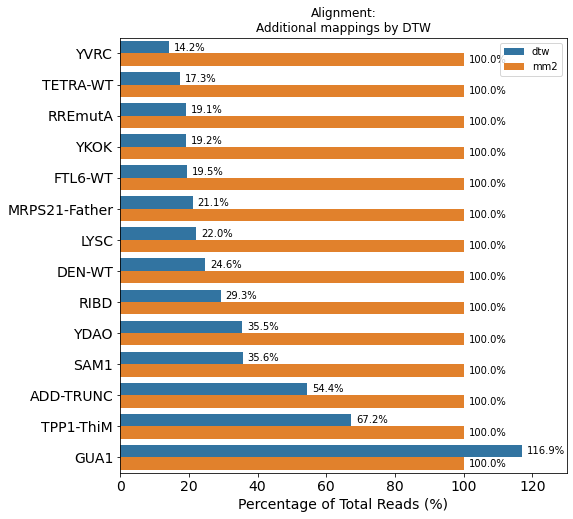

In [6]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_revision_v1_20250220/1_compare_PORE_vs_sm-PORE/nanopolish_vs_sm-PORE/2_mod_rate_sm-PORE/results/'
df_counts_relative = pd.read_csv(dir+'df_counts_relative_mm2_dtw.txt', sep='\t')
df_counts_relative = df_counts_relative.sort_values(by='pct')

fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=True)

# 1st column
# -----------
sns.barplot(y="gene", x="pct", hue="category", data=df_counts_relative)
ax.set_xlabel("Percentage of Total Reads (%)", fontsize=14)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(0, 130)
ax.legend(loc="upper right")
ax.set_title("Alignment:\nAdditional mappings by DTW")

for p in ax.patches:
    ax.annotate("%.1f%%" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
plt.savefig(dir_out+'Fig1h_DTW_rescued_reads.pdf',bbox_inches='tight') 

In [ ]:
## 2. supp_Fig3b ---------
### combine mod rate 1 and mod rate 2 ------------------------
### supp_Fig3b -----------

gene           category
ADD-TRUNC      dtw         1.360707
               mm2         1.262999
DEN-WT         dtw         1.333435
               mm2         1.154677
FTL6-WT        dtw         1.552250
               mm2         1.368275
GUA1           dtw         2.118595
               mm2         1.258992
LYSC           dtw         1.019965
               mm2         1.805916
MRPS21-Father  dtw         1.276558
               mm2         1.149331
RIBD           dtw         1.080941
               mm2         1.009707
RREmutA        dtw         0.990126
               mm2         0.894481
SAM1           dtw         1.942187
               mm2         1.506312
TETRA-WT       dtw         0.754980
               mm2         0.699200
TPP1-ThiM      dtw         1.557769
               mm2         1.396260
YDAO           dtw         1.323194
               mm2         1.541340
YKOK           dtw         1.044727
               mm2         0.955988
YVRC           dtw         1.237798
    

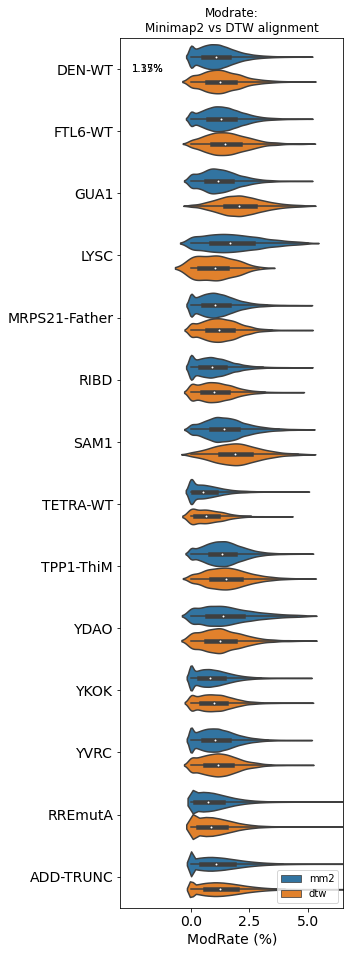

In [7]:
dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
df_subset_mm2_dtw = pd.read_csv(dir_out+'mod_rate_mm2_vs_DTW.txt',sep='\t')
print(df_subset_mm2_dtw.groupby(['gene','category'])["modrate"].mean())

fig, ax = plt.subplots(1, 1, figsize=(4, 16), sharex=False, sharey=True)

# 2nd column--
# ------------
sns.violinplot(y="gene", x="modrate", hue="category", data=df_subset_mm2_dtw)  # linewidth=1.5,ax=ax
ax.set_xlabel("ModRate (%)", fontsize=14)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(-3, 6.5)
ax.legend(loc="lower right")
ax.set_title("Modrate:\nMinimap2 vs DTW alignment")
ax.set_xticks([0.0, 2.5, 5.0])
ax.set_xticklabels([0.0, 2.5, 5.0])

p_genes = ["DEN-WT", "FTL6-WT", "GUA1", "LYSC", "MRPS21-Father", "RIBD", "SAM1", "TETRA-WT", "TPP1-ThiM", "YDAO", "YKOK", "YVRC","RREmutA","ADD-TRUNC"]

for no, p in enumerate(ax.patches):

    p_gene = p_genes[no%(len(p_genes))]

    if (no // (len(p_genes))) == 0:
        mr = df_subset_mm2_dtw[(df_subset_mm2_dtw.gene==p_gene)&(df_subset_mm2_dtw.category=="mm2")].modrate.mean()
        ax.annotate("%.2f%%" % mr, xy=(-2.5, p.get_y()+p.get_height()/2),
                xytext=(0, 0), textcoords='offset points', ha="left", va="center")
    else:
        mr = df_subset_mm2_dtw[(df_subset_mm2_dtw.gene==p_gene)&(df_subset_mm2_dtw.category=="dtw")].modrate.mean()
        ax.annotate("%.2f%%" % mr, xy=(-2.5, p.get_y()+p.get_height()/2),
                xytext=(0, 0), textcoords='offset points', ha="left", va="center")

dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
fig.savefig(dir_out+'Supp_3b_ribo_minimap2_vs_DTW_mod_rate.pdf',bbox_inches='tight')

In [ ]:
## 3. Fig1j ---------

mm2 vs. dtw: Mann-Whitney-Wilcoxon test smaller, P_val:0.000e+00 U_stat=9.132e+09


/tmp/ipykernel_29232/2514726159.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_subset_mm2_dtw_groupby_cat = df_subset_mm2_dtw.groupby("category").mean().reset_index()


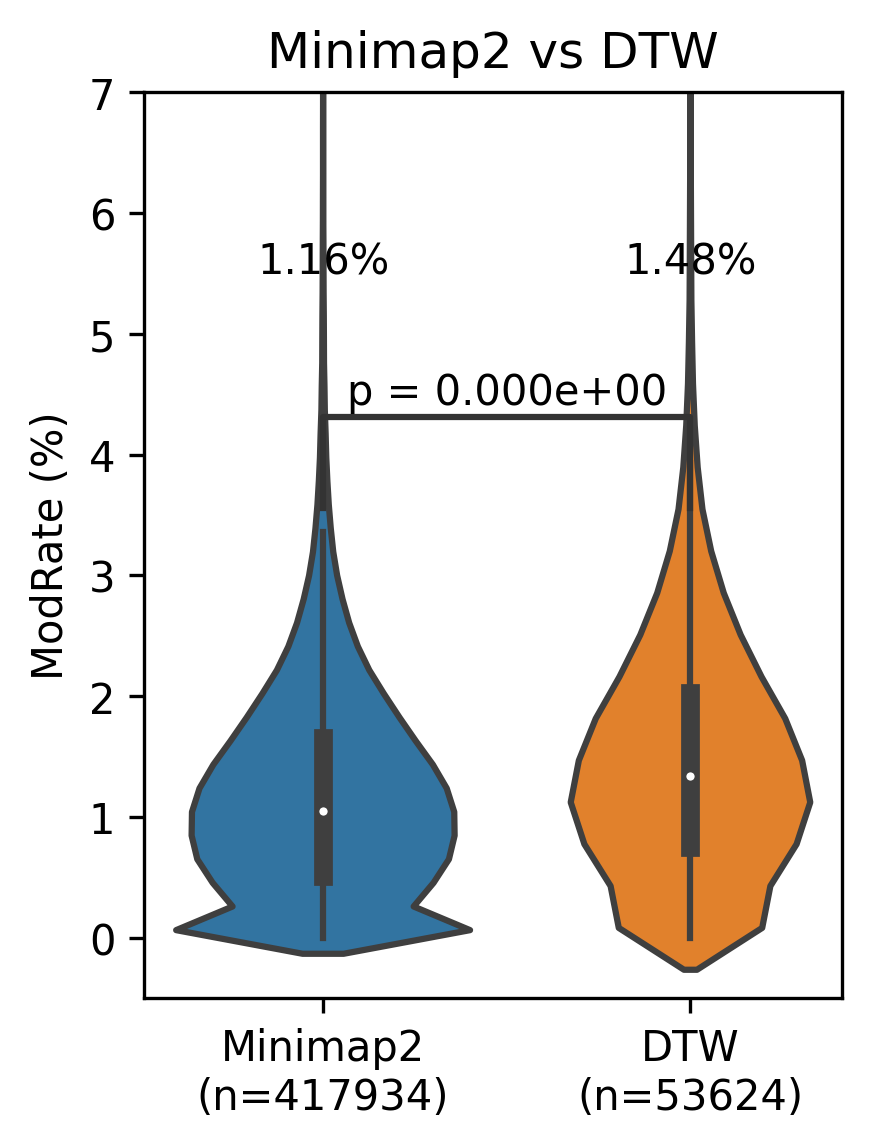

In [8]:
dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
df_subset_mm2_dtw = pd.read_csv(dir_out+'summary_mod_rate_mm2_vs_DTW.txt',sep='\t')

fig, ax = plt.subplots(1, 1, figsize=(3, 4), dpi=300)
sns.violinplot(x="category", y="modrate", data=df_subset_mm2_dtw, ax=ax, linewidth=1.5, order=["mm2", "dtw"])
ax.set_title("Minimap2 vs DTW")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Minimap2", "DTW"])
ax.set_xticklabels(["Minimap2\n(n=%s)" % df_subset_mm2_dtw[df_subset_mm2_dtw.category=="mm2"].shape[0], 
                    "DTW\n(n=%s)" % df_subset_mm2_dtw[df_subset_mm2_dtw.category=="dtw"].shape[0]])
ax.set_xlabel(None)
ax.set_ylabel("ModRate (%)")

order = ["mm2", "dtw"]
pairs = [("mm2", "dtw")]                                                           
annotator = Annotator(ax, pairs, data=df_subset_mm2_dtw, 
                      x="category", 
                      y="modrate", order=order)
annotator.configure(test="Mann-Whitney-ls", text_format="full", show_test_name=False)
annotator.apply_test()
annotator.annotate(line_offset_to_group=-0.01)

df_subset_mm2_dtw_groupby_cat = df_subset_mm2_dtw.groupby("category").mean().reset_index()


for no, label in enumerate(["mm2", "dtw"]):

    #mr = df_mrs[(df_mrs.category==label)].modrate.values[0]
    mr = df_subset_mm2_dtw_groupby_cat[(df_subset_mm2_dtw_groupby_cat.category==label)].modrate
    ax.annotate("%.2f%%" % mr, xy=(no, 5.6),
                xytext=(0, 0), textcoords='offset points', ha="center", va="center")
ax.set_ylim(-0.5, 7)

dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
fig.savefig(dir_out+'Fig1j_mod_rate_minimap2_vs_DTW.pdf',bbox_inches='tight')